  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.15.1-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached optree-0.17.0-cp310-cp310-win_amd64.whl.metadata (34 kB)
  Using cached ml_dtypes-0.5.3-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [3]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [4]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [5]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

c:\Users\trisa\OneDrive\Desktop\DAY2\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1036 - loss: 2.8214 - val_accuracy: 0.0997 - val_loss: 2.3042
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1253 - loss: 2.2460 - val_accuracy: 0.1678 - val_loss: 2.1330
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1697 - loss: 2.1141 - val_accuracy: 0.1726 - val_loss: 2.1932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1722 - loss: 2.1050 - val_accuracy: 0.1801 - val_loss: 2.1420
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1737 - loss: 2.0930 - val_accuracy: 0.1806 - val_loss: 2.0749
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1729 - loss: 2.0892 - val_accuracy: 0.1765 - val_loss: 2.0830
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1762 - loss: 2.0832 - val_accuracy: 0.1884 - val_loss: 2.0746
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1769 - loss: 2.0776 - val_accuracy: 0.

In [8]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1840 - loss: 2.0588
test loss:2.0588033199310303
test accuracy:0.18400000035762787
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.10360000282526016, 0.12530000507831573, 0.16972500085830688, 0.17215000092983246, 0.17374999821186066, 0.17292499542236328, 0.17622500658035278, 0.17694999277591705, 0.17964999377727509, 0.1761000007390976], [2.8214213848114014, 2.245983600616455, 2.1141300201416016, 2.105011224746704, 2.093043565750122, 2.089216709136963, 2.083223819732666, 2.077608585357666, 2.0783791542053223, 2.075512170791626], [0.09969999641180038, 0.16779999434947968, 0.17260000109672546, 0.1800999939441681, 0.18060000240802765, 0.17649999260902405, 0.188400000333786, 0.1809999942779541, 0.17829999327659607, 0.1881999969482422], [2.3041722774505615, 2.132969856262207, 2.193178176879883, 2.1419625282287598, 2.074856758117676, 2.0829906463623047, 2.074634552001953, 2.0760505199432373, 2.150331735610962, 

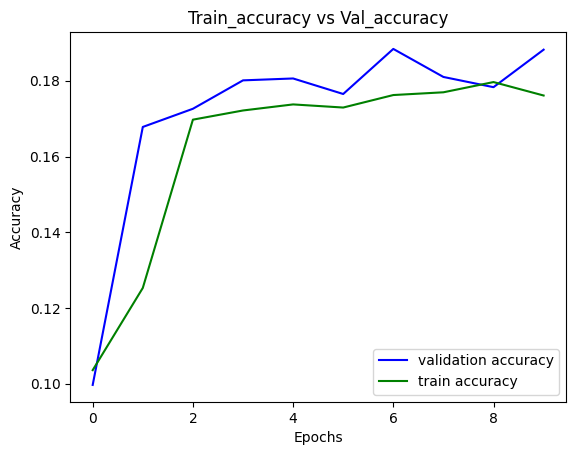

In [9]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

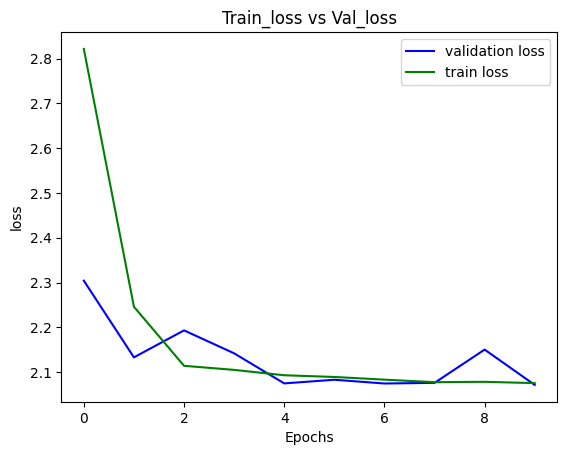

In [10]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [11]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0996 - loss: 2.6289 - val_accuracy: 0.0952 - val_loss: 2.3035
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0977 - loss: 2.3033 - val_accuracy: 0.0977 - val_loss: 2.3045
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0991 - loss: 2.3036 - val_accuracy: 0.1014 - val_loss: 2.3034
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1005 - loss: 2.3035 - val_accuracy: 0.0952 - val_loss: 2.3039
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0991 - loss: 2.3035 - val_accuracy: 0.0997 - val_loss: 2.3035
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0993 - loss: 2.3036 - val_accuracy: 0.0997 - val_loss: 2.3035
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0974 - loss: 2.3036 - val_accuracy: 0.0980 - val_loss: 2.3040
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1001 - loss: 2.3037 - val_accuracy: 0.

In [14]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1000 - loss: 2.3035
test loss:2.303457498550415
test accuracy:0.10000000149011612


In [ ]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2084 - loss: 2.5674

In [ ]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3398 - loss: 1.8283
test loss:1.8283088207244873
test accuracy:0.33980000019073486


In [ ]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2309 - loss: 2.1014 - val_accuracy: 0.2580 - val_loss: 1.9816
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2998 - loss: 1.8930 - val_accuracy: 0.2979 - val_loss: 1.9166
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3207 - loss: 1.8529 - val_accuracy: 0.3209 - val_loss: 1.8646
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3266 - loss: 1.8402 - val_accuracy: 0.3380 - val_loss: 1.8368
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3329 - loss: 1.8337 - val_accuracy: 0.3350 - val_loss: 1.8411
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3382 - loss: 1.8168 - val_accuracy: 0.3368 - val_loss: 1.8312
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3429 - loss: 1.8141 - val_accuracy: 0.3300 - val_loss: 1.8377
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3403 - loss: 1.8166 - val_accuracy: 0.

In [ ]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3448 - loss: 1.7981
test loss:1.798079252243042
test accuracy:0.3447999954223633


In [ ]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()